In [1]:
import pandas as pd
import geopandas as gp
import pylab as pl
import numpy as np
import json
from shapely.geometry import Point

%matplotlib inline

In [2]:
loc = "2017-10-14_Redland_tweets.json"

In [83]:
#with open('loc, 'r') as f:
 #   line = f.readline() # read only the first tweet/line
#   tweet = json.loads(line) # load it as Python dict
 #   print(json.dumps(tweet, indent=4)) # pretty-print

SyntaxError: EOL while scanning string literal (<ipython-input-83-721b583c157a>, line 1)

In [3]:
user_jsons = []
with open("data/2017-10-17_Police_tweets.json", 'rb') as f:
    for line in f:
        while True:
            try:
                jfile = json.loads(line)
                break
            except ValueError:
                # Not yet a complete JSON value
                line += next(f)
        user_jsons.append(jfile)

In [4]:
len(user_jsons) #8

27262

In [5]:
from geopandas import GeoDataFrame as gdf

In [6]:
longs = []
lats = []
name = []
for i in range(len(user_jsons)):
    if user_jsons[i]["coordinates"] is not None:
        longs.append(user_jsons[i]["coordinates"]["coordinates"][0])
        lats.append(user_jsons[i]["coordinates"]["coordinates"][1])
        name.append(user_jsons[i]["user"]["screen_name"])

In [7]:
myDict = {"longs": longs, "lats": lats, "name":name}

In [8]:
df = pd.DataFrame(myDict)

In [9]:
df.head()

,lats,longs,name
0,34.586656,-119.980975,Realsurfshop
1,36.488630,-119.729721,_EdwardNunez_
2,33.943100,-117.228000,KYUTIEPIEKYU
3,37.894110,-122.574270,drvolks
4,37.381344,-122.180281,SCHJobs


In [10]:
geometry = [Point(xy) for xy in zip(df.longs, df.lats)]

In [11]:
df = df.drop(['longs', 'lats'], axis=1)


In [12]:
crs = {'init': 'epsg:4326'}
tweets = gp.GeoDataFrame(df, crs=crs, geometry=geometry)

In [13]:
tweets.head()

,name,geometry
0,Realsurfshop,POINT (-119.980975 34.58665556)
1,_EdwardNunez_,POINT (-119.72972051 36.48863024)
2,KYUTIEPIEKYU,POINT (-117.228 33.9431)
3,drvolks,POINT (-122.57427 37.89411)
4,SCHJobs,POINT (-122.1802812 37.3813444)


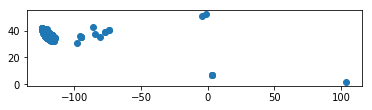

In [14]:
tweets.plot()

In [15]:
states = gp.read_file("data/states/cb_2016_us_state_500k.shp")

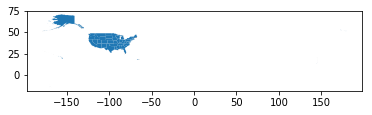

In [16]:
states.plot()

(0, 80)

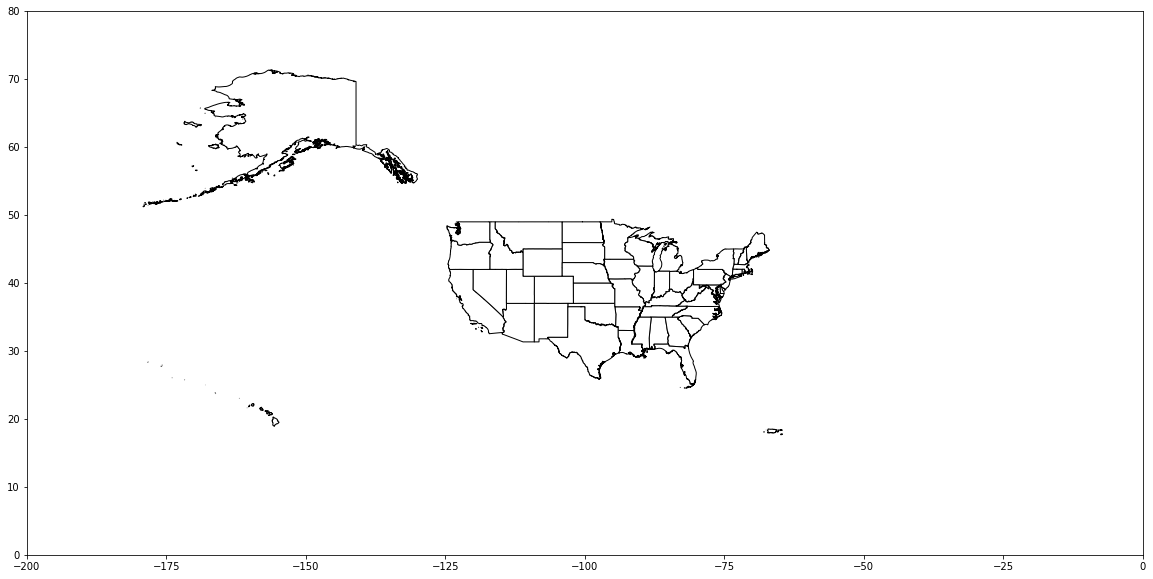

In [24]:
ax = pl.figure(figsize=(20,10)).add_subplot(111)
ax = states.plot(color='white', edgecolor='black', ax=ax);
ax.set_xlim(-200, 0)
ax.set_ylim(0, 80)

In [17]:
tweets = tweets.to_crs(states.crs)

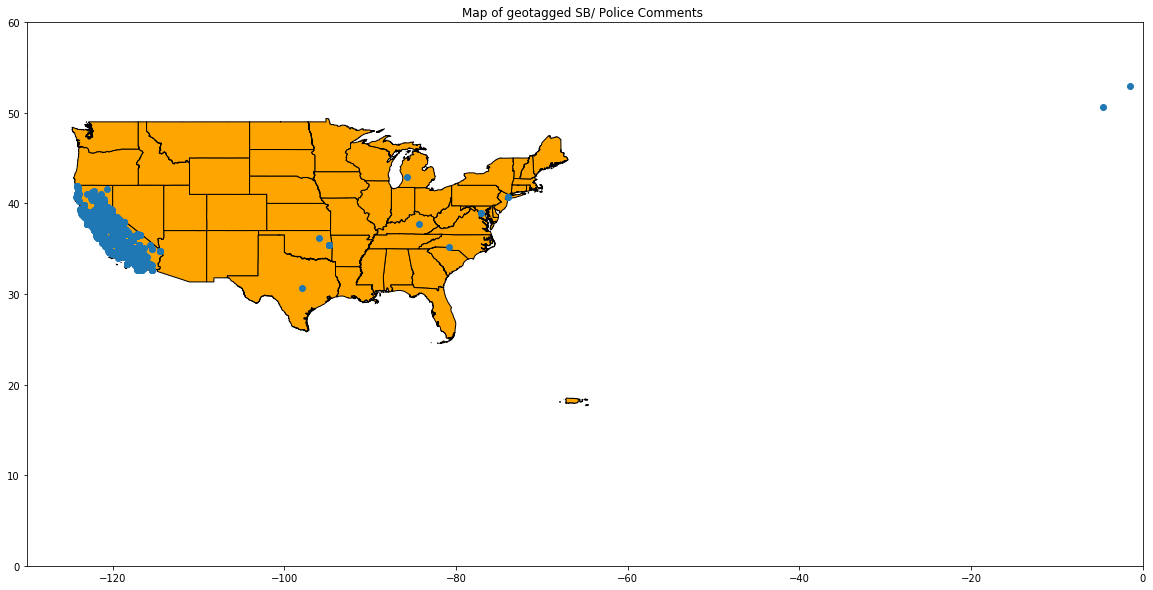

In [29]:
ax = pl.figure(figsize=(20,10)).add_subplot(111)
ax = states.plot(color='orange', edgecolor='black', ax=ax);
ax.set_xlim(-130, 0)
ax.set_ylim(0, 60)
tweets.plot(ax=ax)
pl.title('Map of geotagged SB/ Police Comments ')